# Homework 1 - MATH420
## Camilo Velez R
*This notebook only includes graph/coding, all calculations made by hand are appended*

#### 1)

In [1]:
using DataFrames
using Dates

In [2]:
# import the data
v = readlines("./data.txt");
y = parse.(Int, v);

In [3]:
dr = Date("2020-01-01"):Day(1):Date("2020-12-31")

Date("2020-01-01"):Day(1):Date("2020-12-31")

In [4]:
df = DataFrame();
df.date = dr;
df.y = y;
first(df)


,date,y
,Date,Int64
1,2020-01-01,2007931


In [5]:
days = Dates.dayname.(Date("2023-02-06"):Day(1):Date("2023-02-12"));

In [6]:
df.day = Dates.dayname.(df.date);

In [7]:
for d in days
    df[!, d] = zeros(Int, 366);
    transform!(df, :, [:day] => ByRow(_day -> _day == d) => Symbol(d))
end

In [8]:
first(df, 4)

,date,y,day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
,Date,Int64,String,Bool,Bool,Bool,Bool,Bool,Bool
1,2020-01-01,2007931,Wednesday,0,0,1,0,0,0
2,2020-01-02,2189419,Thursday,0,0,0,1,0,0
3,2020-01-03,2071805,Friday,0,0,0,0,1,0
4,2020-01-04,1969761,Saturday,0,0,0,0,0,1


In [9]:
m1 = (select(df, Not([:date, :y, :day])));
@assert names(m1) == days

In [10]:
m1 = Matrix(m1);

In [11]:
@show β1 = m1 \ df.y;

β1 = m1 \ df.y = [2.128183788461539e6, 2.156038788461539e6, 2.168723773584906e6, 2.1683554150943398e6, 2.136273807692308e6, 2.010182557692308e6, 1.9695172500000002e6]


Since the value of $\beta_{1}$ is smallest for Sunday, we could assume from this model that Sundays regularly have the smallest energy demand, since we have to weigh its basis the smallest in our model

### b)

In [12]:
resid1 = y - m1*β1;

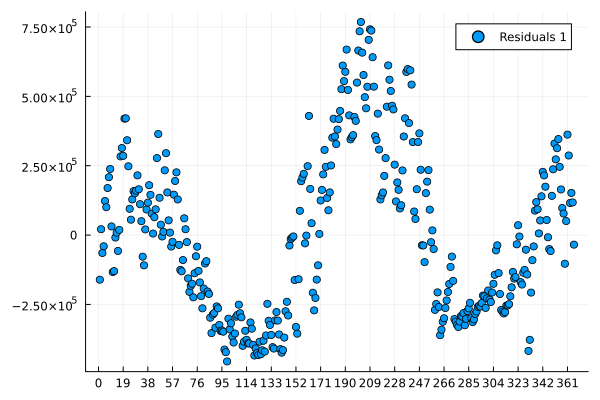

In [13]:
using Plots
x = range(1, 366)
plot(x, resid1, seriestype="scatter", mode="markers", label="Residuals 1", xticks = 0:19:366)

Upon manual inspection (thank you, HTML), we discover that $x=[162, 331, 332, 359]$ seem to be outliers*
*I used Plotly locally to graph this in HTML and interact with it, in this way I was able to specifically target each point and thus realized that these data points had the value they have. I was not able to get Plotly to render in GitHub or NBViewer, therefore I resorted to a static plot*

In [14]:
out1 = [162, 331, 332, 359, 366];

In [15]:
for n in out1
    @show df[n, :]
end

df[n, :] = DataFrameRow
 Row │ date        y        day        Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
     │ Date        Int64    String     Bool    Bool     Bool       Bool      Bool    Bool      Bool
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
 162 │ 2020-06-10  2598188  Wednesday   false    false       true     false   false     false   false
df[n, :] = DataFrameRow
 Row │ date        y        day       Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
     │ Date        Int64    String    Bool    Bool     Bool       Bool      Bool    Bool      Bool
─────┼───────────────────────────────────────────────────────────────────────────────────────────────
 331 │ 2020-11-26  1750827  Thursday   false    false      false      true   false     false   false
df[n, :] = DataFrameRow
 Row │ date        y        day     Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
     │ Date        

For the first outlier - June 6, 2020 - I found it hard to explain why the real energy consumption was so much more than what our model predicted. It was a critical moment in US history and large number of people, I assume, were paying attention to the news and media, and probably watching a lot of TV. George Floyd's funeral was on June 9, 2020, so there is a possibility that a very large number of people spent the next day watching the news and coverage about this. Since COVID restrictions had started to ease for the first time in some states, people could also have been paying attention to the covering of this.

For the next two data points - Nov 26, 2020; Nov 27, 2020 - it is interesting to see that the expected energy consumption was much higher than the actual consumption. This was Thanksgiving and Black Friday. It could be argued that one possibility is that people ignored tight restrictions and had large gatherings and in this way, there were more houses that were not occupied for these two days, thus saving energy. On Black Friday, maybe people did not cook as much since they had so many leftovers, and this also could save energy.

For the last two outliers, these were Christmas Eve and New Year's Eve. A similar argue could be made where more families and more people were gathered together and there was less energy consumption in those houses that were empty

### c)

Let $x = 1$ when the date is Jan 01, 2020. Then we have:

In [16]:
x1 = 1:366
x2 = .^(1:366, 2);
x3 = .^(1:366, 3);
df.x1 = x1;
df.x2 = x2;
df.x3 = x3;
m2 = Matrix(select(df, Not([:date, :y, :day])));

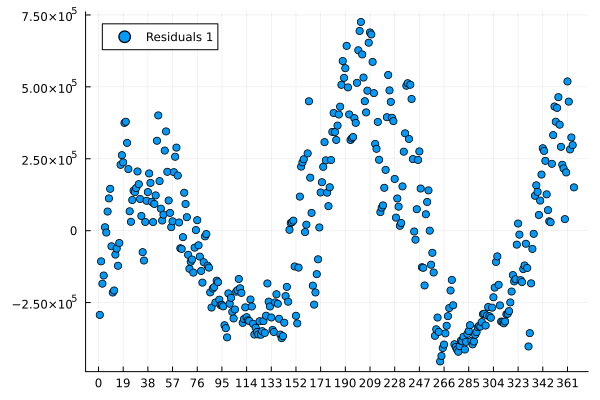

In [17]:
β2 = m2\y
resid2 = y - m2*β2;
plot(x, resid2, seriestype="scatter", mode="markers", label="Residuals 1", xticks = 0:19:366)

In [18]:
using Random
Random.seed!(1233)
r1 = randn(366);

In [19]:
df.r1 = r1;
m3 = Matrix(select(df, Not([:date, :y, :day])));

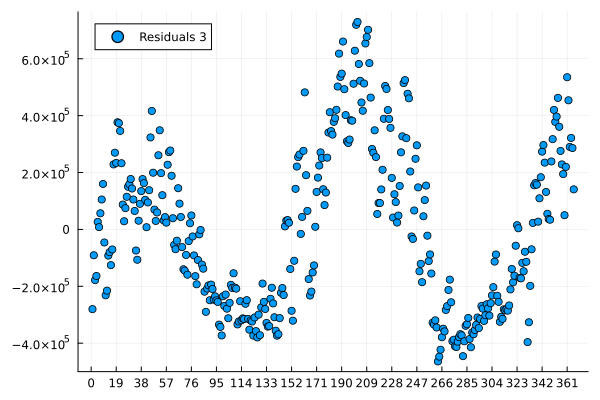

In [20]:
β3 = m3\y
resid3 = y - m3*β3;
plot(x, resid3, seriestype="scatter", mode="markers", label="Residuals 3", xticks = 0:19:366)

Adding a vector of random floats did not seem to have any significant change/improvement on our model

In [21]:
transform!(df, :date => ByRow(month) => :month);

Let's assume we have information about average consumption per month during 2019. If we used this as a basis function in our model, it would probably get rid of the curvilinear trend:

In [22]:
using Statistics
transform!(groupby(df, :month), :y => mean => :mean); # add mean of month's consumption to each row

In [23]:
m4 = Matrix(select(df, Not([:date, :y, :day, :month])));

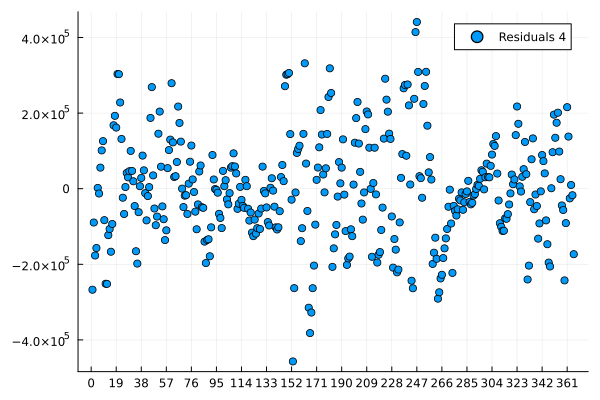

In [24]:
β4 = m4\y
resid4 = y - m4*β4;
plot(x, resid4, seriestype="scatter", mode="markers", label="Residuals 4", xticks = 0:19:366)

Of course in this case we are using $y$ to predict $y$ so it is cheating. But it was an interesting exercise

From [The National Weather Service](https://weather.gov) I took the average monthly temperature recorded at Central Park in NYC for 2020. [Here](https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf) I used this data as a proxy for average monthly temperature in the Mid Atlantic

In [25]:
avg_monthly = [39.41, 40.1, 48.0, 50.4, 60.3, 74.7, 80.0, 76.9, 68.8, 57.9, 53.0, 39.2];
gettemp(n::Int) = avg_monthly[n];

In [26]:
transform!(df, :month => ByRow(gettemp) => :avgtemp);

In [27]:
m5 = Matrix(select(df, Not([:date, :y, :day, :mean, :month])));

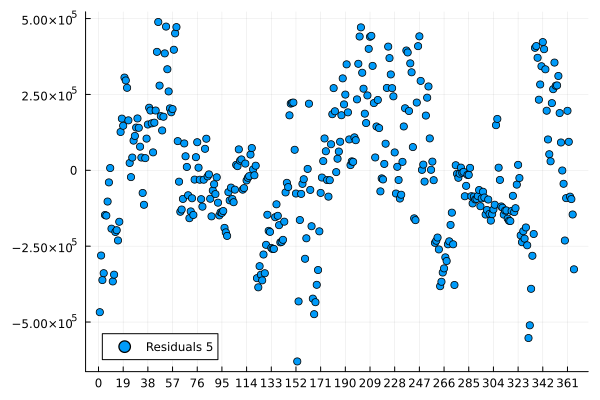

In [28]:
β5 = m5\y
resid5 = y - m5*β5;
plot(x, resid5, seriestype="scatter", mode="markers", label="Residuals 5", xticks = 0:19:366)

Using this new data as a new basis function does remove some of the curvilinear trend, but not entirely. It might suggest that there is a relationship between energy consumption and average monthly temperature but it is either not so strong or maybe it depends more on daily temperature variations than monthly averages.

From [this](https://github.com/nychealth/coronavirus-data) GitHub repository from NYC Health Department, I took the daily case count for COVID-19 during 2020 in NYC - as a proxy for COVID cases in the Mid Atlantic -to see if this had any effect. More specifically, [here](https://github.com/nychealth/coronavirus-data/blob/master/trends/cases-by-day.csv)

In [29]:
# load covid cases in NYC
using CSV
covid = DataFrame(CSV.File("./cases-by-day.csv"));
# it starts 02-29-2020
first(covid, 2)

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG
,String15,Int64,Int64,Int64,Int64
1,02/29/2020,1,0,0,0
2,03/01/2020,0,0,0,0


In [30]:
length(Date("2020-02-29"):Day(1):Date("2020-12-31"))

307

In [31]:
length(Date("2020-01-01"):Day(1):Date("2020-02-28"))

59

In [32]:
covidnums = first(covid, 307).CASE_COUNT;
covidvec = vcat(zeros(Int, 59), covidnums); 

In [33]:
df[!, :covid] = covidvec;

In [34]:
m6 = Matrix(select(df, Not([:date, :y, :day, :mean, :month])));

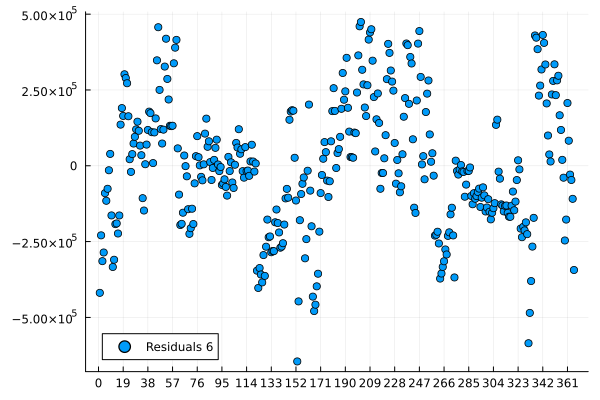

In [35]:
β6 = m6\y
resid6 = y - m6*β6;
plot(x, resid6, seriestype="scatter", mode="markers", label="Residuals 6", xticks = 0:19:366)

These new data, although it removes the curvilinear trend to a certain degree, does not seem to generate a significant improvement in our model. All this suggests that maybe our first guesses of factors that influence energy consumption (like temperature and COVID cases in 2020) might not be the biggest factors that actually have an impact on how much energy people consume

---

## II

In [36]:
f1 = 0;
f2 = 1;
h = 0.1;
y = 1;
for t in 0:h:1-h
    f1 = 2t-y^4;
    f2 = 2*(t+h) + (y+h*f1)^2;
    y = y + f1*h;
end
y

1.1198119302274656

* a) That MATLAB code - and this Julia code - solve an ODE problem. They use Euler's method to solve it. The initial value problem they solve is
$f(t, y) = y'=2t-y^4$ with $y(0) = 1$
* b) Since the desired accuracy refers to the global error of using Euler's Method and this is inversely proportional to the size of $h$, the step size should be squared to increase its accuracy from $10^{-2}$ to $10^{-4}$.